# Aula 30 - Busca em grafos

## Objetivos:
- Implementar em Python os algoritmos de busca em largura, de busca em profundidade e de Dijkstra.
- Testá-los em um grafo criado com o pacote [NetworkX](https://networkx.github.io/).

## Busca em grafos

Nas aulas teóricas vimos três algoritmos que permitem fazer a busca em grafo. O algoritmo de busca em largura, o algoritmo de busca em profundidade e o algoritmo de Dijkstra. Os dois primeiros permitem ver todos os nós alcançáveis a partir de determinado nó, enquanto o terceiro permite encontrar todos os caminhos mais curtos de um nó até todos os outros nós alcançáveis do grafo.

Antes de iniciarmos a implementação de cada algoritmo, vamos criar um grafo para usar para os nossos testes.

**Exercício:** Use o NetworkX para criar o grafo da figura.

![alt text](https://docs.google.com/uc?export=download&id=1CfOnqTVRXzvSgGy5O_jFOcNahBvogFbt)

(-1.1450064746949613,
 0.9063976467192979,
 -0.7371793536624623,
 0.8097728492752096)

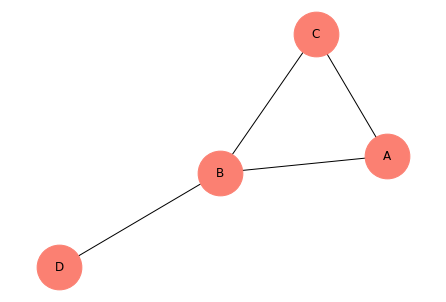

In [2]:
# Digite o seu código aqui
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_edge('A','B')
G.add_edge('A','C')
G.add_edge('B','C')
G.add_edge('B','D')
nx.draw(G, node_color='#fb8072', node_size=2000, with_labels=True)
plt.axis('equal')

## Busca em largura (*breadth-first search*)

A busca em largura permite identificar todos os nós alcançaveis a partir de um determinado nó do grafo. A sua principal característica é o uso de uma fila para armazenar os nós a serem processados.

A descrição e a figura a seguir apresentam o algoritmo de forma ligeiramente diferente da apresentada em sala, mas que se aproxima mais da implementação final do algoritmo.

Os passos a seguir são empregados:
1. A fila começa apenas com o nó inicial
2. Enquanto a fila não estiver vazia:
 - Retire um nó da fila para ser o nó atual
 - Se o nó ainda não tiver sido visitado:
    - Marque-o como visitado
    - Adicione seus vizinhos na fila
3. Devolva como resultado os nós visitados

![alt text](https://docs.google.com/uc?export=download&id=171cXT_Z-zqaRDK7UEZOgAR1IviBC4IVK)


**Exercício:** Implemente em Python a busca em largura. Teste o código com o grafo do exercício anterior para uma busca com início no nó A. Mostre a evolução da fila.
> **Dica:** Use a classe `deque` do módulo `collections` para ter uma fila eficiente. Para obter os vizinhos de um nó, o NetworkX oferece duas maneiras: a primeira é pela chamada do método `neighbors` que recebe como argumento o nó para o qual se quer os vizinhos; a segunda por uma sintaxe semelhante à indexação empregada diretamente ao grafo com valor do nó para o qual se quer obter os vizinhos. Por exemplo, para um grafo `G` e um nó `u`, os vizinhos podem ser obtidos por `G[u]`.

In [9]:
# Digite seu código aqui
from collections import deque 
def busca_em_largura(G,no_inicial):
  visitados = set()
  fila = deque([no_inicial])
  print(fila)
  while fila:
    no_atual = fila.popleft()
    print(fila)
    if no_atual not in visitados:
      visitados.add(no_atual)
      fila.extend(G.neighbors(no_atual)) #G[no_atual]
      print(fila)
  return visitados

busca_em_largura(G,'A')


deque(['A'])
deque([])
visitadosset()
deque(['B', 'C'])
deque(['C'])
visitados{'A'}
deque(['C', 'A', 'C', 'D'])
deque(['A', 'C', 'D'])
visitados{'A', 'B'}
deque(['A', 'C', 'D', 'A', 'B'])
deque(['C', 'D', 'A', 'B'])
visitados{'A', 'C', 'B'}
deque(['D', 'A', 'B'])
visitados{'A', 'C', 'B'}
deque(['A', 'B'])
visitados{'A', 'C', 'B'}
deque(['A', 'B', 'B'])
deque(['B', 'B'])
visitados{'D', 'A', 'C', 'B'}
deque(['B'])
visitados{'D', 'A', 'C', 'B'}
deque([])
visitados{'D', 'A', 'C', 'B'}


{'A', 'B', 'C', 'D'}

## Busca em profundidade (*Depth-first search*)

A busca em profundidade também permite identificar todos os nós alcançáveis a partir de um determinado nó de um grafo. A sua principal característica é o uso de uma pilha para armazenar os nós a serem processados.

A descrição e a figura a seguir apresentam o algoritmo de forma ligeiramente diferente da apresentada em sala, mas que se aproxima mais da implementação final do algoritmo.

Os passos a seguir são empregados:
1. A pilha começa apenas com o nó inicial
2. Enquanto a pilha não estiver vazia:
 - Retire um nó da pilha para ser o nó atual
 - Se o nó ainda não tiver sido visitado:
    - Marque-o como visitado
    - Adicione seus vizinhos na pilha
3. Devolva como resultado os nós visitados

![alt text](https://docs.google.com/uc?export=download&id=1NT_UIGAsWY5fQiU9I0LBB9ecAklJSlBr)

**Exercício:** Implemente em Python a busca em profundidade. Teste o código com o grafo do exercício anterior para uma busca com início no nó A. Mostre a evolução da pilha. Compare a evolução da pilha com a evolução da lista no exercício anterior. Reflita sobre como seria o desenho da figura com o passo a passo, se no passo 3 os nós B e C estivessem invertidos na pilha. 
R: O C não tem vizinhos, se invertesse perceberia melhor a busca em profundidade, pq o B tem vizinhos

Casos proibidos - BP - buscas longas BL - buscas curtas

In [10]:
# Digite seu código aqui
def busca_em_profundidade(G,no_inicial):
  visitados = set()
  pilha = [no_inicial]
  print(pilha)
  while pilha:
    no_atual = pilha.pop()
    print(pilha)
  #  print(f'visitados{visitados}')
    if no_atual not in visitados:
      visitados.add(no_atual)
      pilha.extend(G.neighbors(no_atual)) #G[no_atual]
      print(pilha)
  return visitados

busca_em_profundidade(G,'A')


deque(['A'])
deque([])
deque(['B', 'C'])
deque(['B'])
deque(['B', 'A', 'B'])
deque(['B', 'A'])
deque(['B', 'A', 'A', 'C', 'D'])
deque(['B', 'A', 'A', 'C'])
deque(['B', 'A', 'A', 'C', 'B'])
deque(['B', 'A', 'A', 'C'])
deque(['B', 'A', 'A'])
deque(['B', 'A'])
deque(['B'])
deque([])


{'A', 'B', 'C', 'D'}

## Dijkstra

O algoritmo de Dijkstra permite obter os caminhos mais curtos de um determinado nó até os demais nós do grafo.

A descrição e a figura a seguir apresentam o algoritmo de forma ligeiramente diferente da apresentada em sala, mas que se aproxima mais da implementação final do algoritmo. Aqui, trataremos apenas do caso em que os pesos das arestas são todos um.

Os passos a seguir são empregados:
1. A fila começa apenas com o nó inicial e a distância do nó de origem até ele mesmo é zero.
2. Enquanto a fila não estiver vazia:
 - Retire um nó da fila para ser o nó atual
 - Atualize a distância até o próximo nó
 - Para cada um dos nós adjacentes ainda não visitados, atualize as novas distâncias
 - Adicione à fila os nós adjacentes não visitados
3. Devolva como resultado as distâncias aos nós

Note que a estrutura de dados que mantém as distâncias, já serve para registro dos nós que já foram visitados.
> **Dica:** Use um dicionário para manter as distâncias.

![alt text](https://docs.google.com/uc?export=download&id=1Y0LJrQApySXWlaG46bHggdFy29b4ew5-)

**Exercício:** Implemente em Python o algoritmo de Dijkstra. Teste o código com o grafo do exercício anterior para conhecer a distância do nó A aos demais nós. Considere que todas as arestas têm peso 1.

In [22]:
# Digite seu código aqui
def Dijkstra(G,no_inicial):
  dist = {no_inicial:0}
  fila = deque([no_inicial])
  while fila:
    no_atual = fila.popleft()
    nova_dist = dist[no_atual] + 1
    for node in G[no_atual]:
      if node not in dist:
        dist[node] = nova_dist
        fila.extend(G.neighbors(no_atual))
  return dist

Dijkstra(G,'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 2}

**Nota:** O NetworkX já tem esses e vários outros algoritmos implementados. Veja, por exemplo, a Seção de [Traversal](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html) e de [Shortest Paths](https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html) da documentação.